# Karman-Trefftz airfoil

For the second assignment of this class, you have used the Joukowski transformation, a conformal map that shapes a cylinder into an airfoil with a cusp at the trailing edge.

Here, we are going to use another conformal map: the Karman-Trefftz transform.
This transform allows us to represent the potential flow around a class of airfoils with a non-zero tail angle at the trailing edge known as Karman-Trefftz airfoils.


**Some recommendations**:

During this exam, you will have to write functions in Python.
Remember, docstrings are cool, they document your functions and help users to understand them.

You will also create some figures.
Make sure they are generated with a publication-quality, that is, the presence of a title or caption, axis labels, and legend (when necessary).

For figures including a filled contour, we recommend the use of the 'viridis' colormap over the usual 'jet'; the last one is not perfectly perceptually-uniform.

In [38]:
# Import your libraries here
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

---

## First part - Karman-Trefftz conformal mapping

---

### Conformal mapping

The Karman-Trefftz transformation maps a cylinder (defined in the $\xi$-plane) to an airfoil ($z$-plane) that possesses a non-zero tail angle at the trailing edge.

$$z = n \frac{\left(1 + \frac{b^2}{\xi}\right)^n + \left(1 - \frac{b^2}{\xi}\right)^n}{\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n}$$

where $n = 2 - \frac{\theta}{\pi}$, $\theta$ being the tail angle (in radians) at the trailing edge and $b$ a parameter that controls the thickness of the airfoil.

Note that when we choose a zero tail-angle, the Karman-Trefftz transform reduces to the Joukowski transform.

First, we need to create the conformal mapping between the $\xi$-plane of the cylinder and the $z$-plane of the airfoil.

**List of tasks:**

1- Write a function for the conformal mapping that takes the complex coordinates in the $\xi$-plane as an argument and returns the the comlpex coordinates in the $z$-plane.

To check your function, here is what we obtained:
the point $2.2 + 2.2j$ maps into the point $2.41874477821 + 1.98092269337j$ when using $b=1$ and $theta=5^o$.

In [39]:
# Write your conformal mapping function in this cell.

def kt_transform(n, b, xi):
    
    A = b**2/xi
    z = n*((1+A)**n + (1-A)**n) / ((1+A)**n - (1-A)**n)

    return z

In [40]:
#check function 

b = 1.0
theta = 5.0*(2*math.pi/360) #angle in radians 
n = 2-(theta/math.pi)

xi_test = 2.2+(2.2*1j)

z_test = kt_transform(n, b, xi_test)
print(z_test)

(2.418744778214259+1.9809226933678878j)


---

### From a cylinder  to an airfoil

Let's use our new function to map a cylinder into a Karman-Trefftz airfoil.

**List of tasks:**

1- Create a cylinder centered at $\left(x_c, y_c\right)$ with radius $R = \sqrt{\left(b-x_c\right)^2 + y_c^2}$ with $N$ points on its surface where the first and last points overlap.

Use the following parameters:
* $x_c = -0.1$, $y_c = 0.1$
* $b = 1.0$
* $\theta = 5^o$
* $N = 61$

2- Apply the Karman-Trefftz transformation using the function you previously defined to get the complex coordinates of the cambered airfoil.

3- Plot the two geometries on a figure.

4- What is the index and coordinates of the trailing-edge point?

5- What is the location of the first point on the airfoil?

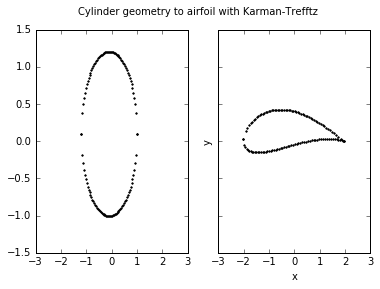

In [50]:
# Use this cell to write your code.

#Create a cylinder centered at xc, yc with 
#Radius = numpy.sqrt((b-xc)**2 + yc**2)

xc, yc = -0.1, 0.1
b = 1.0
theta = 5.0*(2*math.pi/360) #angle in radians 
n = 2-(theta/math.pi)
N = 61

R = numpy.sqrt((b-xc)**2 + yc**2) #radius of the cylinder

x = numpy.linspace(-R, R, N)+xc
y_circle_pos = numpy.sqrt(R**2 - ((x-xc)**2))+yc
y_circle_neg = -numpy.sqrt(R**2 - ((x-xc)**2))+yc

x_circle = numpy.concatenate([x,x])
y_circle = numpy.concatenate([y_circle_pos, y_circle_neg])
xy = numpy.vstack((x_circle, y_circle))

xi = numpy.empty_like(xy, dtype=complex)
#print(xi.shape)
xi.real = xy[0,:]
xi.imag = xy[1,:]

#Apply Karman-Trefftz transformation
z = kt_transform(n, b, xi)

#Figure with circle and cambered airfoil 

#size=10
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
pyplot.suptitle('Cylinder geometry to airfoil with Karman-Trefftz')
pyplot.xlabel('x')
pyplot.ylabel('y')
ax1.scatter(xi.real, xi.imag, s=1)
ax2.scatter(z.real, z.imag, s=1)

In [53]:
#4- What is the index and coordinates of the trailing-edge point?

print('The index of the trailding edge point is:', xi[1,0])
print('The coordinates of the trailding edge point are:', xi[1,0])

#5- What is the location of the first point on the airfoil?

print('The location of the first point on the airfoil is:', xi[1,0])

The location of the first point on the airfoil is: (-1.20453610172+0.1j)


---

### Mesh-grid in polar coordinates

To visualize the flow in a domain, we should probably create a mesh-grid. Let us do it in polar coordinates in the cylinder-plane ($\xi$-plane).

**List of tasks:**

1- Discretize the mesh-grid using $100$ points in the radial direction ($R\leq r \leq R+5$) and $61$ points on the surface of the cylinder (from $0$ to $2\pi$).

2- Apply the Karman-Trefftz transformation to obtain the mesh-grid in the airfoil-plane ($z$-plane). (Yes! You can use the function we created above.)

3- Plot the mesh-grid in both planes.

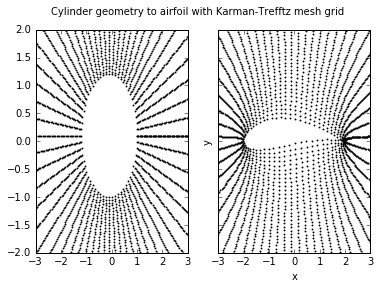

In [56]:
# Create mesh-grid in polar coordinates of cylinder plane 

n_r = 100 
n_theta = 61 

r_start = R
r_end = R+5

r = numpy.linspace(r_start, r_end, n_r)
theta = numpy.linspace(0, 2*numpy.pi, n_theta)
r, theta = numpy.meshgrid(r, theta)

xr = (numpy.cos(theta)*r)+xc
yr = (numpy.sin(theta)*r)+yc
xi_2 = numpy.empty_like(xr, dtype=complex)
xi_2.real = xr
xi_2.imag = yr

#2- apply Karman-Trefftz transform
z_2 = kt_transform(n, b, xi_2)

#3- plot mesh grid, both planes
size=20
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
pyplot.xlim(-3.0, 3.0)
pyplot.ylim(-2.0, 2.0)
ax1.scatter(xi_2.real, xi_2.imag, s=0.8)
pyplot.suptitle('Cylinder geometry to airfoil with Karman-Trefftz mesh grid')
pyplot.xlabel('x')
pyplot.ylabel('y')
ax2.scatter(z_2.real, z_2.imag, s=0.8)

---

### Freestream + doublet = ?

We are now going to compute the velocity field around a cylinder in the $\xi$-plane.

As we now know, the inviscid flow around a cylinder (with no circulation) can be represented by the sum of a freestream and a doublet.

We will use a freestream with speed $U_\infty = 1$ and angle of incidence $\alpha = 0^o$.

**List of tasks:**

1- What should be the strength of the doublet to represent the flow around a cylinder of radius $R$ immersed in a freestream flow with speed $U_\infty$?

2(a)- Write a function that returns the velocity due to a freestream on a given mesh-grid.

2(b)-Write a function that returns the streamfunction due to a freestream on a given mesh-grid.

3(a)- Write a function that returns the velocity due to a point-doublet on a given mesh-grid.

3(b)- Write a function that returns the streamfunction due to a point-doublet on a given mesh-grid.

4- Using those functions, apply the principle of superposition to get the streamfunction and velocity in the cylinder-plane ($\xi$-plane).

5- Plot the streamlines using [`pyplot.contour`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and the velocity field using [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver).

In [7]:
# Write your functions in this cells.

def doublet(u_inf, strength, xd, yd, X, Y):
    """Function that returns velocity and streamfunction for a doublet"""
    
    u_d = -strength/(2*numpy.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v_d = -strength/(2*numpy.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    psi_d = -strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)

    return u_d,v_d, psi_d

def fs(u_inf, X, Y, Nx, Ny, alpha):
    """Function that returns velocity and streamfunction for a doublet"""

    u_fs = u_inf * numpy.ones((Nx, Ny), dtype=float) * numpy.cos(alpha)
    v_fs = u_inf * numpy.ones((Nx, Ny), dtype=float) * numpy.sin(alpha)

    psi_fs = u_inf * (Y*numpy.cos(alpha) - X*numpy.sin(alpha))
    
    return u_fs, v_fs, psi_fs

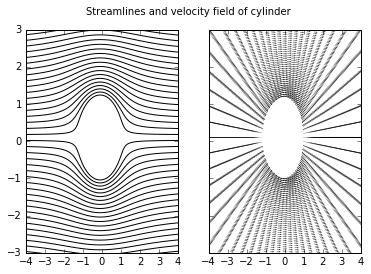

In [57]:
# Use this cell to provide the rest of the code.

u_inf = 1.0
strength_d = (R**2)*2*numpy.pi*u_inf #strength of doublet 
alpha = 0

u_d, v_d, psi_d = doublet(u_inf, strength_d, xc, yc, xr, yr)
u_fs, v_fs, psi_fs = fs(u_inf, xr, yr, n_theta, n_r, alpha)

#superposition

u = u_d + u_fs
v = v_d + v_fs
psi = psi_d + psi_fs

#streamlines and velocity field 

size=20
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
ax1.contour(xi_2.real, xi_2.imag, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 80))
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
ax2.quiver(xi_2.real, xi_2.imag, u, v, units='inches', scale=20.0)
pyplot.suptitle('Streamlines and velocity field of cylinder')


---

### Freestream + doublet... Is that enough?

Let's use the theory of conformal mapping to obtain the velocity field around the airfoil in the $z$-plane

We remember that the complex velocity in the $z$-plane is related to the complex one in the $\xi$-plane via the following formula:

$$W_z = W_\xi / \frac{dz}{d\xi}$$

where $W_z = u_z - i v_z$ and $W_\xi = u_\xi - iv_\xi$.

The derivative of $z$ with respect to $\xi$ is:

$$\frac{dz}{d\xi} = \frac{4n^2b^2}{\xi^2 - b^4} \frac{\left(1 + \frac{b^2}{\xi}\right)^n \left(1 - \frac{b^2}{\xi}\right)^n}{\left[\left(1 + \frac{b^2}{\xi}\right)^n - \left(1 - \frac{b^2}{\xi}\right)^n\right]^2}$$

**List of tasks:**

1- Write a function that takes the complex coordinates in the $\xi$-plane as argument and returns the value of the derivative $\frac{dz}{d\xi}$.

To check your function, here is what we obtained:
the function on the point $2.2 + 2.2j$ returns the point $1.00022655827 + 0.0995002428218j$ when using $b=1$ and $theta=5^o$.

2- Compute the velocity on the mesh-grid in the airfoil plane ($z-plane$).

3- Plot the streamlines and the velocity field in the $z$-plane using the Matplotlib functions [`pyplot.contour()`](http://matplotlib.org/api/pyplot_api.html?highlight=contour#matplotlib.pyplot.contour) and [`pyplot.quiver()`](http://matplotlib.org/api/pyplot_api.html?highlight=quiver#matplotlib.pyplot.quiver), respectively.

4- Does the streamlines at the trailing-edge look physical? Why?
(You can display a zoom at the trailing-edge to support your answer.)

In [9]:
# Use this cell to write your function.

#1- write function that takes complex coordinates in the xi-plane and returns the derivative value dz/dxi
def deriv(n, b, xi):
    
    A = b**2/xi
    B = (4*n**2*b**2)/(xi**2-b**4)
    dzdxi = B*((1+A)**n * (1-A)**n) / ((1+A)**n - (1-A)**n)**2
    
    return dzdxi

#check function
xi_test = 2.2 + 1j*2.2
b = 1
theta = 5*numpy.pi/180
n = 2-theta/numpy.pi

dzdxi_test = deriv(n, b, xi_test)
print(dzdxi_test)

(1.0002265582728567+0.09950024282184348j)


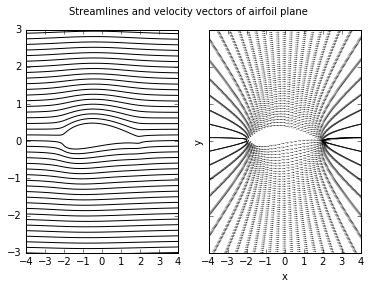

In [58]:
#2- Compute the velocity on the mesh grid

Wxi = numpy.empty_like(xr, dtype=complex)
Wxi = u - 1j*v
#print(Wz.shape)

dzdxi = deriv(n, b, xi_2)
#print(dzdxi.shape)

Wz = Wxi / dzdxi

uz = Wz.real
vz = Wz.imag

#3- plot streamlines and velocity field 

size=20
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
ax1.contour(z_2.real, z_2.imag, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 80))
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
ax2.quiver(z_2.real[::1,::1], z_2.imag[::1,::1], uz[::1,::1], vz[::1,::1], units='inches', scale=20.0)
pyplot.suptitle('Streamlines and velocity vectors of airfoil plane')
pyplot.xlabel('x')
pyplot.ylabel('y')

4- Does the streamlines at the trailing-edge look physical? Why? (You can display a zoom at the trailing-edge to support your answer.)

(-1, 1)

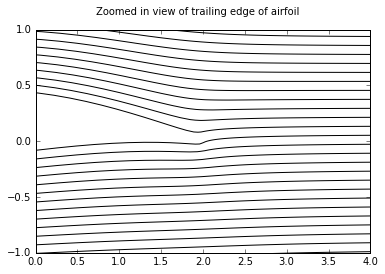

In [59]:
pyplot.contour(z_2.real, z_2.imag, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 150))
pyplot.suptitle('Zoomed in view of trailing edge of airfoil')
pyplot.xlim(-0,4)
pyplot.ylim(-1,1)

The streamlines at the trailing edge do not look physical.

---

### Pressure coefficient

Let's have a look at the pressure coefficient to check what's going on.

**List of tasks:**

1- Compute the pressure coefficient and plot its filled contour in both planes using the Matplotlib function [`pyplot.contourf()`](http://matplotlib.org/api/pyplot_api.html?highlight=contourf#matplotlib.pyplot.contourf).

2- What is the minimum value of the pressure coefficient on the surface of the airfoil?

3- What are the index of the stagnation points?

4- The angle of incidence of the freestream is zero, so why is the stagnation point not at the trailing edge?

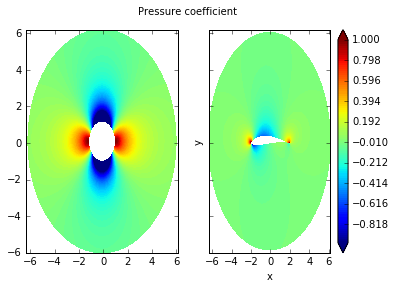

In [61]:
# Use this cell to write your code.

#1- compute the pressure coefficient and plot its filled contour in both planes
cp_xi = 1.0 - numpy.sqrt(u**2+v**2)**2/u_inf**2
cp_z = 1.0 - numpy.sqrt(uz**2+vz**2)**2/u_inf**2

f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
contf=ax1.contourf(xi_2.real, xi_2.imag, cp_xi, levels = numpy.linspace(-1,1,100), extend='both')
ax2.contourf(z_2.real, z_2.imag, cp_z, levels = numpy.linspace(-1,1,100), extend='both')
cbar = pyplot.colorbar(contf)
pyplot.suptitle('Pressure coefficient')
pyplot.xlabel('x')
pyplot.ylabel('y')

In [67]:
#2- what is the minimum value of the pressure coefficient on the surface of the airfoil 
min_cp = numpy.min(cp_z[:,0])

print('The minimum pressure coefficient on the surface of the airfoil is: {}'.format(min_cp))

The minimum pressure coefficient on the surface of the airfoil is: -2672.6843719481335


In [14]:
#3- What are the index of the stagnation points?
vel_surf = numpy.sqrt(uz[:,0]**2 + vz[:,0]**2)
stags = numpy.where((numpy.round(vel_surf,2))==0.0)
print(stags)

(array([ 0, 30, 60]),)


4- The angle of incidence of the freestream is zero, so why is the stagnation point not at the trailing edge?

---

### Kutta condition!

We need to satisfy the [Kutta condition](http://en.wikipedia.org/wiki/Kutta_condition),
>"A body with a sharp trailing edge which is moving through a fluid will create about itself a circulation of sufficient strength to hold the rear stagnation point at the trailing edge."

**List of tasks:**

1- Calculate the circulation needed to satisfy the Kutta condition (i.e. to bring the stagnation point to the trailing-edge).

2(a)- Write a function that returns the velocity field due to a vortex-point on a given mesh-grid.

2(b)- Write a function that returns the streamfunction due to a vortex-point on a given mesh-grid.

3- Apply the principle of superposition to take into account the effect of the vortex.

4- Compute and plot the streamlines and velocity field in both planes.

5- Compute and plot filled contour of pressure coefficient in both planes.

6- What are the index of the stagnation points? Is it what you were expecting?

In [15]:
# Use this cell to write your functions.
def vortex(strength, xv, yv, X, Y):
    """Function that returns velocity field and streamfunction for a vortex"""

    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)

    return u, v, psi

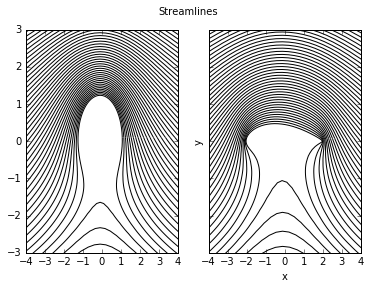

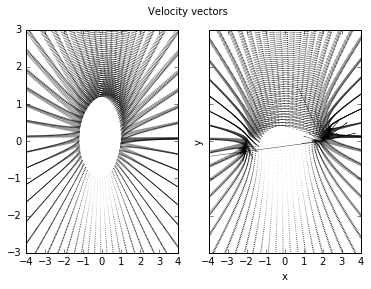

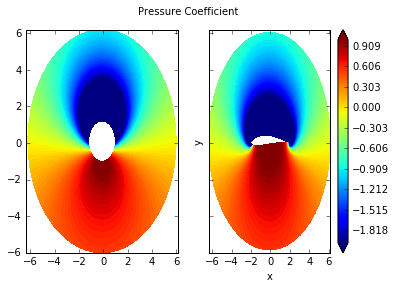

In [63]:
#calculate circulation strength of vortex needed to satisfy Kutta condition
strength_v = 4*numpy.pi*

u_v, v_v, psi_v = vortex(strength_v, xc, yc, xr, yr)

#Superposition

u = u_d + u_fs + u_v
v = v_d + v_fs + v_v
psi = psi_d + psi_fs + psi_v

#converting back to z plane

Wxi = numpy.empty_like(xr, dtype=complex)
Wxi = u - 1j*v
#print(Wz.shape)

dzdxi = deriv(n, b, xi_2)
#print(dzdxi.shape)

Wz = Wxi / dzdxi

uz = Wz.real
vz = Wz.imag

#Pressure coefficients
cp_xi = 1.0 - numpy.sqrt(u**2+v**2)**2/u_inf**2
cp_z = 1.0 - numpy.sqrt(uz**2+vz**2)**2/u_inf**2

#Plotting 

size=20
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
ax1.contour(xi_2.real, xi_2.imag, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 80))
ax2.contour(z_2.real, z_2.imag, psi, colors='k', linestyles='solid', levels=numpy.linspace(numpy.min(psi),numpy.max(psi), 80))
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
pyplot.suptitle('Streamlines')
pyplot.xlabel('x')
pyplot.ylabel('y')

size=20
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
ax1.quiver(xi_2.real[::1,::1], xi_2.imag[::1,::1], u[::1,::1], v[::1,::1], units='inches', scale=20.0)
ax2.quiver(z_2.real[::1,::1], z_2.imag[::1,::1], uz[::1,::1], vz[::1,::1], units='inches', scale=20.0)
pyplot.xlim(-4,4)
pyplot.ylim(-3,3)
pyplot.suptitle('Velocity vectors')
pyplot.xlabel('x')
pyplot.ylabel('y')

size=20
f, (ax1, ax2) = pyplot.subplots(1, 2, sharex=True, sharey=True)
contf = ax1.contourf(xi_2.real, xi_2.imag, cp_xi, levels = numpy.linspace(-2,1,100), extend='both')
ax2.contourf(z_2.real, z_2.imag, cp_z, levels = numpy.linspace(-2,1,100), extend='both')
cbar = pyplot.colorbar(contf)
pyplot.suptitle('Pressure Coefficient')
pyplot.xlabel('x')
pyplot.ylabel('y')


---

### What about the lift and drag?

The drag is defined as the force felt by the body in the direction of the freestream and the lift as the one normal to the freestream direction.

**List of tasks:**

1- Assuming a density $\rho=1$ and a farfield pressure $p_\infty=0$, calculate the lift in two manners:
* using the Kutta-Joukowski theorem,
* integrating the pressure along the surface of the cylinder.

2- Calculate the drag by integrating the pressure along the surface of the cylinder. What's the value? Is it what you were expecting? Why?

In [84]:
#1a - Calculate lift using Kutta-Joukowski theorem
rho = 1
lift_kj = -rho*u_inf*strength_v

#1b - Calculate lift by integrating pressure along the surface of the cylinder
p_inf = 0
#lift_int = 

#2 - Calculate drag by integrating pressure along the surface of the cylinder
#drag_int = 

print('The lift by the Kutta-Joukowski theorem is:',lift_kj)
#print('The lift by integrating pressure is:',lift_int)
#print('The drag by integrating pressure is:',drag_int)

The lift by the Kutta-Joukowski theorem is: [-0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619 -0.00619
 -0.006

---

## Second part - Sources and vortices

---

In the first part of the exam, we have used a conformal mapping and the complex-variable theory to model the flow around an airfoil.

Here, we are going to provide you a set of points which represent the previously used Karman-Trefftz airfoil, as well as the source-strength and vortex-strength associated with each point.

Your task will be to load those data from a file, compute the velocity field generated by those singularities, and apply the principle of superposition.

We are going to use the same freestream conditions: speed $U_\infty = 1$ with angle of incidence $\alpha = 0^o$.

The file `airfoil_data_midterm.txt` contains $N$ lines (where $N$ is the number of points used to discretize the airfoil) and 4 columns (x-coordinates, y-coordinates, source-strenghts, and vortex-strengths).

You are problably wondering how we obtained those source-strenghts and vortex-strengths.
Well, they are the solution from a source-vortex panel method that we are going to program during the second part of the semester.

**List of tasks:**

1- Read the data from the file `airfoil_data_midterm.txt` using the Numpy function [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). (You might want to set the keyword argument `unpack` to `True`.)

2- Create a $201 \times 201$ Cartesian mesh-grid that covers the domain $[-2.5, 2.5]\times[-2.5, 2.5]$.

3- Write a function to compute the velocity field due a source-point.

4- Compute the velocity field generated by the freestream, the source-points, and the vortex-points and plot the streamlines using the Matplotlib function [`pyplot.streamplot()`](http://matplotlib.org/api/pyplot_api.html?highlight=streamplot#matplotlib.pyplot.streamplot).

5- Compute the pressure coefficient on the mesh-grid and plot its filled contour. What are the coordinates of the maximum pressure coefficient?

6- Calculate the lift using the Kutta-Joukowski theorem. (Hint: the total circulation corresponds to the sum of all vortex strengths.)

In [69]:
#1 - Read the data from the file airfoil_data_midterm.txt

airfoil = numpy.loadtxt('airfoil_data_midterm.txt', unpack=True)
airfoil_x = airfoil[0]
airfoil_y = airfoil[1]
strength_s = airfoil[2]
strength_v = airfoil[3]

#print(airfoil.size)
#print(airfoil.shape)
#print(strength_s)
#print(strength_v)
#pyplot.plot(airfoil_x, airfoil_y)

In [70]:
#2 - Create a 201 x 201 Cartesian mesh grid 
N = 201 
x_start, x_end = -2.5, 2.5
y_start, y_end = -2.5, 2.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [71]:
#3- Write a function to compute the velocity field due a source-point.

def source(strength, xs, ys, X, Y):
    """Returns the velocity field generated by a source/sink"""
  
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2 + (Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2 + (Y-ys)**2)
    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))

    return u,v, psi

def vortex(strength, xv, yv, X, Y):
    """Function that returns velocity and streamfunction for a vortex"""

    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)

    return u, v, psi

In [72]:
#4- Compute the velocity field generated by the freestream, the source-points, and the vortex-points

#freestream
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N,N), dtype = float)
v_freestream = numpy.zeros((N,N), dtype = float)
psi_freestream = u_inf * Y

#source points
u_s = numpy.zeros((N,N))
v_s = numpy.zeros((N,N))
psi_s = numpy.zeros((N,N))

for i in range(0, len(strength_s)):
    u, v, psi = source(strength_s[i], airfoil_x[i], airfoil_y[i], X, Y)
    u_s += u
    v_s += v
    psi_s += psi

#vortex points
u_v = numpy.zeros((N,N))
v_v = numpy.zeros((N,N))
psi_v = numpy.zeros((N,N))

for i in range(0, len(strength_v)):
    u, v, psi = vortex(strength_v[i], airfoil_x[i], airfoil_y[i], X, Y)
    u_v += u
    v_v += v
    psi_v += psi
    
#superposition
u = u_freestream + u_s + u_v
v = v_freestream + v_s + v_v
psi = psi_freestream + psi_s + psi_v 

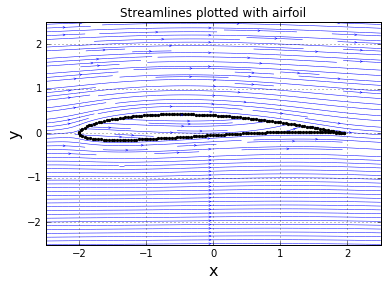

In [75]:
#4 -- and plot the streamlines 

size = 10
#pyplot.figure(figsize=(size, (y_end - y_start)/(x_end - x_start) * size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.title('Streamlines plotted with airfoil')
pyplot.streamplot(X, Y, u, v, density = 2, linewidth=0.5, arrowsize=0.5, arrowstyle='->')
pyplot.scatter(airfoil_x, airfoil_y, marker='o', color='k', s=5)
#pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

The maximum pressure coefficient is: 0.957073247234038
The array indices of the maximum pressure coeffient are: (100, 19)


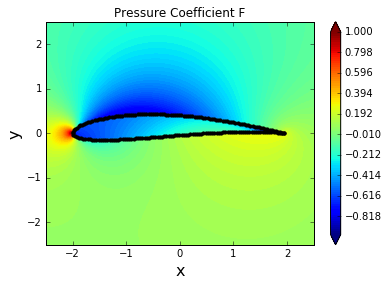

In [82]:
#5- Compute the pressure coefficient on the mesh-grid and plot its filled contour. What are the coordinates of the maximum pressure coefficient?

cp = 1.0 - (u**2+v**2)/u_inf**2

#maximum pressure coefficient

maxCp = numpy.max(cp)
print('The maximum pressure coefficient is: {}'.format(maxCp))

#find array indices of max pressure coefficient
loc_maxCp = numpy.argmax(cp)
maxCp_indices = numpy.unravel_index(loc_maxCp, cp.shape)

print('The array indices of the maximum pressure coeffient are: {}'.format(maxCp_indices))
max_CpX, max_CpY = maxCp_indices

#pressure coefficient field 
#size = 10
#pyplot.figure(figsize=(1.1*size, (y_end - y_start)/(x_end - x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize = 16)
pyplot.title('Pressure Coefficient F')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-1, 1, 100), extend='both')
cbar = pyplot.colorbar(contf)
pyplot.scatter(airfoil_x, airfoil_y, marker='o', color='k', s=10)

In [83]:
#6- Calculate the lift using the Kutta-Joukowski theorem. 
#Hint: the total circulation corresponds to the sum of all vortex strengths.

rho = 1
circ = sum(strength_v)
#print(g)

lift = -rho*u_inf*circ
print('The lift is:',lift)

The lift is: -1.23768
